# Machine learning model

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

## Import data

In [42]:
df = pd.read_csv("../data/merged_data_cleaned.csv", low_memory=False)
target = pd.read_csv("../data/target.csv", low_memory=False)

In [46]:
df

,site,caseid,controltype,studysubjectid,arrivaldate,arrivaltime,arrivaltimend,modearrival,receivedintransfer,dxcspineinjury,...,cspinesignalchange,signalchangelevelc1,signalchangelevelc2,signalchangelevelc3,signalchangelevelc4,signalchangelevelc5,signalchangelevelc6,signalchangelevelc7,cordinjurynoradiographic,injurydatetime
0,1,110001,case,110001,1/1/2000,22:16,0,1,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,1,110001,ems,120027,1/1/2000,17:45,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
2,1,110001,ems,120032,1/1/2000,19:58,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
3,1,110001,moi,130058,1/1/2000,13:20,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
4,1,110001,moi,130072,1/1/2000,16:38,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,17,1713132,ems,1723178,1/1/2000,20:37,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
3310,17,1713132,moi,1733196,1/1/2000,18:05,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
3311,17,1713132,moi,1733220,1/1/2000,17:05,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN
3312,17,1713132,ran,1743311,1/1/2000,15:50,0,1,0,0,...,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN


## EDA

<Axes: xlabel='controltype', ylabel='CSFractures'>

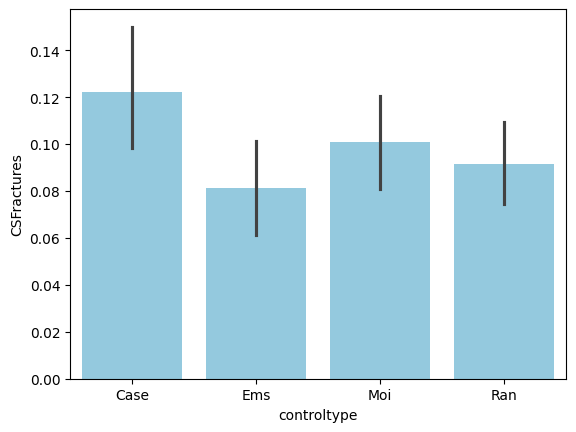

In [53]:
sns.barplot(y=target["CSFractures"], x=df["controltype"].str.capitalize(), color="skyblue")

In [52]:
df["locevalphysician"].str.capitalize()

0       Ed
1       Ed
2       Ed
3       Ed
4       Ed
        ..
3309    Ed
3310    Ed
3311    Ed
3312    Ed
3313    Ed
Name: locevalphysician, Length: 3314, dtype: object

<Axes: xlabel='locevalphysician', ylabel='CSFractures'>

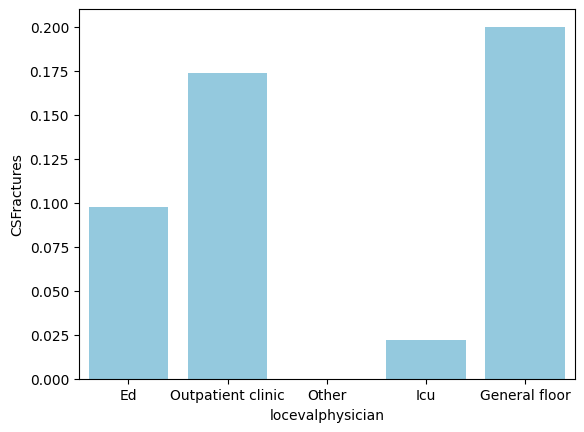

In [54]:
sns.barplot(y=target["CSFractures"], x=df["locevalphysician"].str.capitalize(), color="skyblue", errorbar=None)

In [58]:
target["CSFractures"]

0        True
1        True
2        True
3        True
4       False
        ...  
3309    False
3310    False
3311    False
3312    False
3313    False
Name: CSFractures, Length: 3314, dtype: bool

<Axes: xlabel='site', ylabel='CSFractures'>

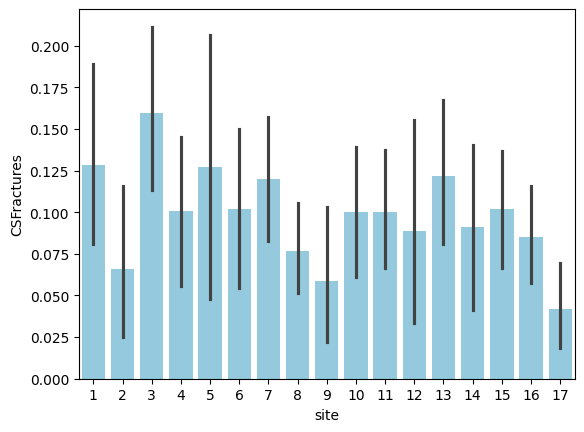

In [57]:
sns.barplot(y=target["CSFractures"], x=df["site"], color="skyblue")

In [ ]:
# Drop column
df.drop(columns='injurydatetime', inplace=True)
df.drop(columns=["arrivaldate","arrivaltimend","arrivaltime"], inplace=True)
df.drop(columns=["sectiongcsavailable","totalgcsavailable","totalgcsmanual","gcseye","verbalgcs","motorgcs"], inplace=True)
df.drop(columns=["controltype", "locevalphysician"], inplace=True)

# Convert "ND" to Nan
df = df.replace('ND', np.nan)

# Clean the data
df.loc[df["totalgcs"] == "7T","totalgcs"] = 7

# Convert all data into float
df = df.astype(float)

ValueError: could not convert string to float: 'ED'

In [34]:
# Which columns have Nan values?
nan_values = df.isna().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

nan_values

ethnicity                          2705
race                                687
limitedrangemotion_dup              507
pttender_dup                        474
sectiongcsavailable_dup             461
ptsensoryloss_dup                   422
ptparesthesias_dup                  422
ptcomppainneckmove_dup              401
payortypeci                         395
payortype                           369
ptextremityweakness_dup             364
otherneurodeficit_dup               330
helmet_dup                          324
hxloc_dup                           318
hxloc                               220
totalgcsavailable_dup               197
ptcomppain_dup                      182
minorinjurieslist                   141
otherinjuries_dup                   125
payortypema                         118
ptambulatoryprioremsarrival_dup      93
cervicalspineimmobilization          74
cspineprecautions                    62
patientsposition_dup                 53
modearrival                          44


In [35]:
df["totalgcs"].value_counts()

totalgcs
15      1342
-1       855
15.0     597
3        117
14        92
13        41
14.0      37
3.0       30
7         27
12        26
10        22
6         21
11        18
13.0      13
9         12
8         12
4          7
9.0        7
10.0       7
5          5
12.0       5
11.0       4
6.0        4
5.0        4
8.0        3
4.0        3
7.0        2
7          1
Name: count, dtype: int64

In [26]:
# Which columns have object data type?
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['controltype', 'modearrival', 'locevalphysician', 'hxloc', 'totalgcs',
       'pttender', 'limitedrangemotion', 'otherinjuries', 'minorinjuries',
       'ptparesthesias', 'ptsensoryloss', 'intubatedss', 'eddisposition',
       'emsarrivaldate', 'emsarrivaltime', 'hxloc_dup',
       'sectiongcsavailable_dup', 'totalgcsavailable_dup', 'avpudetails_dup',
       'avpumental_dup', 'avpumentaltxt_dup', 'avpumentaltxtcat_dup',
       'ptcomppain_dup', 'ptcomppainneckmove_dup', 'pttender_dup',
       'limitedrangemotion_dup', 'otherinjuries_dup', 'minorinjurieslist',
       'ptparesthesias_dup', 'ptsensoryloss_dup', 'ptextremityweakness_dup',
       'otherneurodeficit_dup', 'otherneurodeficitdesc_dup',
       'otherneurodeficitdesccat_dup', 'cervicalspineprecautions',
       'medsgivenothertxt_dup', 'intubatedbyems',
       'pttenderneckothertxtcat_dup', 'ptambulatorypriorarrival_dup',
       'pttenderneckothertxt_dup', 'intervforcervicalstabintfixtxt_dup',
       'intervforcervicalstab